In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
houses = pd.read_csv("kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
x=houses['sqft_living'].values
y=houses['price'].values

In [5]:
mean_x=np.mean(x)
mean_y=np.mean(y)
m=len(y)

In [6]:
num=0
den=0
for i in range (m):
    num=num+ (x[i]-mean_x)*(y[i]-mean_y)
    den=den+ (x[i]-mean_x)**2
b1=num/den
b0=mean_y - (b1*mean_x)

In [7]:
print(b1,b0)

280.6235678974486 -43580.743094474776


In [8]:
rmse=0
for i in range(m):
    y_pred= b0 + b1*x[i]
    rmse+=(y[i]-y_pred)**2
rmse=np.sqrt(rmse)
print(rmse)

38435353.027161


In [9]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*x[i]
    ss_t=(y[i]-mean_y)**2
    ss_r=(y[i]-y_pred)**2
    
r2=1-(ss_r/ss_t)
print(r2)

0.8534322541168573


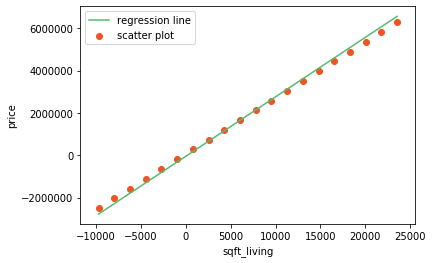

In [21]:
max_x=np.max(x)+1000
min_x=np.min(x)-1000

x=np.linspace(min_x,max_x,20)
y0=b0+ b1*x

plt.plot(x,y0,color='#58b970',label="regression line")

plt.scatter(x,y,c='#ef5423',label="scatter plot")

plt.xlabel("sqft_living")
plt.ylabel("price")
plt.legend()
plt.show()